In [1]:
import json
import pandas as pd

from datetime import datetime
from elasticsearch import Elasticsearch
es = Elasticsearch()

In [2]:
# Query parameters
k = 10000
location = "boston"
start_date = '2020-12-21' # default is '2020-12-21'
end_date = '2021-03-21'   # default is '2020-12-21' + 90d
index_name = "airbnb_history_" + location

In [164]:
# Ranker 1. Return all documents and order by id

res = es.search(index=index_name, body={"size": k, "query": {"match_all": {}}})
print("Got %d Hits:" % res['hits']['total']['value'])
for hit in res['hits']['hits']:
    print("%s " % hit["_score"], "%(listing_url)s %(last_scraped)s %(name)s: %(overall_rating)s" % hit["_source"])

Got 10000 Hits:
1.0  https://www.airbnb.com/rooms/3781 20180718 HARBORSIDE-Walk to subway: 5.0
1.0  https://www.airbnb.com/rooms/5506 20180718 **$99 Special **   Private! Minutes to center!: 4.916666666666667
1.0  https://www.airbnb.com/rooms/6695 20180718 $125 Special!! Home Away! Condo: 4.833333333333333
1.0  https://www.airbnb.com/rooms/6976 20180718 Mexican Folk Art Haven in Boston Residential Area: 4.833333333333333
1.0  https://www.airbnb.com/rooms/8789 20180718 Curved Glass Studio/1bd facing Park: 4.75
1.0  https://www.airbnb.com/rooms/8792 20180718 Large 1 Bed facing State House: 4.916666666666667
1.0  https://www.airbnb.com/rooms/8865 20180718 Walk to Medical Area - room: 4.083333333333333
1.0  https://www.airbnb.com/rooms/9273 20180718 Stay at "HARBORVIEW" Walk to subway: 4.833333333333333
1.0  https://www.airbnb.com/rooms/10758 20180718 Budget Single - share bath: 3.5
1.0  https://www.airbnb.com/rooms/10807 20180718 Budget Double - share bath : 3.3333333333333335
1.0  https:

1.0  https://www.airbnb.com/rooms/6759004 20180718 Stylish & Comfortable Newbury St Studio .#10: 4.916666666666667
1.0  https://www.airbnb.com/rooms/6759439 20180718 South End Studio Perfect for Work Travel #26: 4.916666666666667
1.0  https://www.airbnb.com/rooms/6761345 20180718 Large Bedroom at Allston: 3.0
1.0  https://www.airbnb.com/rooms/6762011 20180718 Heart of South End, Convenient, Comfy Studio #22: 4.833333333333333
1.0  https://www.airbnb.com/rooms/6763409 20180718 Charming Studio in Boston Brownstone, C.Ave#5: 4.833333333333333
1.0  https://www.airbnb.com/rooms/6763587 20180718 Lorna's Oasis: 4.583333333333333
1.0  https://www.airbnb.com/rooms/6764040 20180718 Cozy private apartment for couples/ friends.: 3.5
1.0  https://www.airbnb.com/rooms/6764572 20180718 Experience an 1880s Victorian house: 5.0
1.0  https://www.airbnb.com/rooms/6765855 20180718 Cozy Room in Brownstone Building: 4.666666666666667
1.0  https://www.airbnb.com/rooms/6780300 20180718 Large Sunny room in Bos

1.0  https://www.airbnb.com/rooms/11856912 20180718 Brownstone Apt. in Hip S. End!: 5.0
1.0  https://www.airbnb.com/rooms/11866651 20180718 3 BR|2.5 BA Renovated House Parking Top Location: 5.0
1.0  https://www.airbnb.com/rooms/11866869 20180718 Vibrant East Boston Apartment: 5.0
1.0  https://www.airbnb.com/rooms/11873789 20180718 Cozy Apartment + Porch in South End: 4.916666666666667
1.0  https://www.airbnb.com/rooms/11885653 20180718 Marriott's Customs House: 5.0
1.0  https://www.airbnb.com/rooms/11896394 20180718 Small cozy studio in Allston: 4.666666666666667
1.0  https://www.airbnb.com/rooms/11902134 20180718 Apartment in Historic South End: 4.833333333333333
1.0  https://www.airbnb.com/rooms/11905849 20180718 Comtemporary Luxurious One Bed in Back Bay: 4.416666666666667
1.0  https://www.airbnb.com/rooms/11912139 20180718 Bed, Bath & Beyond IV in JP: 4.916666666666667
1.0  https://www.airbnb.com/rooms/11924459 20180718 Lil’ Italy,Harbor Efficiency Private Entrance: 5.0
1.0  https:

1.0  https://www.airbnb.com/rooms/15288004 20180718 Private Room: Prime Location + Comfortable + Clean: 4.25
1.0  https://www.airbnb.com/rooms/15296865 20180718 Spectacular 1 Bedroom Condo, Walkable  to Anywhere: 0.0
1.0  https://www.airbnb.com/rooms/15308143 20180718 New Luxury 1 bedroom Suite ( W/D ): 4.75
1.0  https://www.airbnb.com/rooms/15313517 20180718 Modern + Cool Spacious Studio Steps to the Subway: 5.0
1.0  https://www.airbnb.com/rooms/15322998 20180718 BIG private room.: 4.666666666666667
1.0  https://www.airbnb.com/rooms/15326552 20180718 Colbyco at D Street - South Boston: 5.0
1.0  https://www.airbnb.com/rooms/15337363 20180718 Colorful 1BR in Downtown Crossing by Sonder: 4.583333333333333
1.0  https://www.airbnb.com/rooms/15338096 20180718 Serene Studio in Downtown Crossing by Sonder: 4.833333333333333
1.0  https://www.airbnb.com/rooms/15338795 20180718 Quiet, 2-bdrm JP home within 5 mins of the T: 4.916666666666667
1.0  https://www.airbnb.com/rooms/15340831 20180718 Sma

1.0  https://www.airbnb.com/rooms/18774656 20180718 Sunny studio at the corner of Boston University: 4.75
1.0  https://www.airbnb.com/rooms/18776123 20180718 Nice 2 BD, Quick to Downtown, Free Parking: 4.666666666666667
1.0  https://www.airbnb.com/rooms/18777049 20180718 Master Bedroom: 4.833333333333333
1.0  https://www.airbnb.com/rooms/18782625 20180718 South end condo with garden patio: 0.0
1.0  https://www.airbnb.com/rooms/18786789 20180718 Beautifully renovated condo in Jamaica Plain: 4.916666666666667
1.0  https://www.airbnb.com/rooms/18788498 20180718 Queen Anne Victorian on 1 acre lot w. guest house: 5.0
1.0  https://www.airbnb.com/rooms/18789496 20180718 Private Space: 4.75
1.0  https://www.airbnb.com/rooms/18789646 20180718 New Beacon Back Bay Elegant 3BR 2 Bath Apts (2): 4.5
1.0  https://www.airbnb.com/rooms/18789766 20180718 Roxbury Crossing: 4.833333333333333
1.0  https://www.airbnb.com/rooms/18790012 20180718 Tidy cozy room near T and Boston: 4.333333333333333
1.0  https:

1.0  https://www.airbnb.com/rooms/21039932 20180718 Good vibes & easy access to the T & Boston: 4.0
1.0  https://www.airbnb.com/rooms/21041069 20180718 (161-4R) Walkable North End!: 4.666666666666667
1.0  https://www.airbnb.com/rooms/21055294 20180718 Cozy Student studio near Harvard: 0.0
1.0  https://www.airbnb.com/rooms/21057574 20180718 Large Room in Victorian Home: 5.0
1.0  https://www.airbnb.com/rooms/21058704 20180718 Pet friendly sunny apartment in BROOKLINE near T: 0.0
1.0  https://www.airbnb.com/rooms/21063622 20180718 Cozy 2BR in Heart of Southie: 5.0
1.0  https://www.airbnb.com/rooms/21067311 20180718 Downtown/Convention/Subway/Beach 130B: 4.916666666666667
1.0  https://www.airbnb.com/rooms/21076367 20180718 Charming 1 Bedroom in Beacon Hill (Downtown BOS): 4.833333333333333
1.0  https://www.airbnb.com/rooms/21079638 20180718 Fenway Home: 4.75
1.0  https://www.airbnb.com/rooms/21090626 20180718 Cozy bedroom in the historic Charlestown: 5.0
1.0  https://www.airbnb.com/rooms/2

1.0  https://www.airbnb.com/rooms/23000230 20180718 Private room in Allston: 4.916666666666667
1.0  https://www.airbnb.com/rooms/23000887 20180718 Private room in Allston: 4.833333333333333
1.0  https://www.airbnb.com/rooms/23001050 20180718 Private Rooms in Allston: 4.916666666666667
1.0  https://www.airbnb.com/rooms/23001243 20180718 Large private room in Allston: 4.833333333333333
1.0  https://www.airbnb.com/rooms/23001550 20180718 Large 5 bedroom apartment in Allston: 5.0
1.0  https://www.airbnb.com/rooms/23004350 20180718 Contemporary,  well kept in Roslindale: 5.0
1.0  https://www.airbnb.com/rooms/23004674 20180718 Maverick Square Queen Bed Apt. in funky location: 5.0
1.0  https://www.airbnb.com/rooms/23005875 20180718 New Studio In Charlestown Close To Waterfront: 4.416666666666667
1.0  https://www.airbnb.com/rooms/23015362 20180718 Visit Boston in historic style!: 0.0
1.0  https://www.airbnb.com/rooms/23015741 20180718 NEW Lux Modern Apartment on Clearway st #38: 5.0
1.0  https

1.0  https://www.airbnb.com/rooms/24738128 20180718 Sunny Entire Apartment -Hearth of Boston: 5.0
1.0  https://www.airbnb.com/rooms/24746941 20180718 Stay aboard an historic ship in Boston Harbor.: 0.0
1.0  https://www.airbnb.com/rooms/24749244 20180718 Stylish Downtown Studio in the SouthEnd, C.Ave# 24: 4.916666666666667
1.0  https://www.airbnb.com/rooms/24754028 20180718 2/1 Condo Near Redline Close to Downtown (29G): 4.25
1.0  https://www.airbnb.com/rooms/24756096 20180718 Boston CHARMER 2 Bedroom, Best Location, Sleeps 6: 5.0
1.0  https://www.airbnb.com/rooms/24756185 20180718 The Velvet Cream Room near the T: 5.0
1.0  https://www.airbnb.com/rooms/24756613 20180718 BRAND new Room w/ A/C only 3 minutes WALK to train: 4.083333333333333
1.0  https://www.airbnb.com/rooms/24756731 20180718 Himalayan Sea Salt Room near the Train: 4.916666666666667
1.0  https://www.airbnb.com/rooms/24768490 20180718 Spacious & Convenient Boston/Longwood Medical: 4.416666666666667
1.0  https://www.airbnb.c

1.0  https://www.airbnb.com/rooms/6298216 20180517 Fun Location, Beautiful & Spacious!: 0.0
1.0  https://www.airbnb.com/rooms/6300089 20180517 Beautiful 3 bed/2 bath: 5 miles to Copley Sq.: 5.0
1.0  https://www.airbnb.com/rooms/6310903 20180517 Charming Victorian Home close to BCEC: 4.916666666666667
1.0  https://www.airbnb.com/rooms/6316145 20180517 Cozy Luxury Apt in Boston/Backbay/Fenway/Symphony: 4.916666666666667
1.0  https://www.airbnb.com/rooms/6317304 20180518 Sunny & beautiful! Walk everywhere!: 4.916666666666667
1.0  https://www.airbnb.com/rooms/6317446 20180517 Brand New 2 BR | 1 BA in So. BOS #2: 4.916666666666667
1.0  https://www.airbnb.com/rooms/6317722 20180517 Brand New 2 BR | 1 BA in So. BOS #3: 4.916666666666667
1.0  https://www.airbnb.com/rooms/6323935 20180517 Charming south end: 4.833333333333333
1.0  https://www.airbnb.com/rooms/6326257 20180517 Renovated 2BR | 1.5BA on Charles St: 4.916666666666667
1.0  https://www.airbnb.com/rooms/6342931 20180517 Beautiful 5 Be

1.0  https://www.airbnb.com/rooms/10764250 20180518 Comfy, spacious, Downtown 15 min.: 4.666666666666667
1.0  https://www.airbnb.com/rooms/10779412 20180517 North End Enchanted Cottage -27 five star reviews: 5.0
1.0  https://www.airbnb.com/rooms/10787333 20180517 Garden Apt - Highland Park/Fort Hill (Orange Line): 4.916666666666667
1.0  https://www.airbnb.com/rooms/10811129 20180517 Lovely 1BD in downtown/theater dis.: 0.0
1.0  https://www.airbnb.com/rooms/10812807 20180517 Cozy 1 bedroom in great location: 0.0
1.0  https://www.airbnb.com/rooms/10835494 20180517 Upscale, loft-style 2-bedroom condo: 4.916666666666667
1.0  https://www.airbnb.com/rooms/10851007 20180517 Cosy Cottage Room on Parker Hill: 0.0
1.0  https://www.airbnb.com/rooms/10857914 20180518 Beacon Hill Townhouse: 5.0
1.0  https://www.airbnb.com/rooms/10859498 20180517 Heart of Newbury Two Bedroom Grand Apartment: 4.833333333333333
1.0  https://www.airbnb.com/rooms/10860611 20180517 Room in charming apt: 5.0
1.0  https://

1.0  https://www.airbnb.com/rooms/15038991 20180517 Spacious 1BR Apt in Financial Dist: 4.916666666666667
1.0  https://www.airbnb.com/rooms/15041925 20180518 Large Private bedroom w ensuite,Walk to Charles!: 4.833333333333333
1.0  https://www.airbnb.com/rooms/15043894 20180517 Boston Furnished Rentals 2A: 4.666666666666667
1.0  https://www.airbnb.com/rooms/15044173 20180517 Boston Furnished Rentals 4B: 4.833333333333333
1.0  https://www.airbnb.com/rooms/15047711 20180517 The Green Nest: 4.75
1.0  https://www.airbnb.com/rooms/15048978 20180517 Boston South End with Loft & Private Roof Deck: 4.916666666666667
1.0  https://www.airbnb.com/rooms/15052939 20180517 Cosy couch available 5 min away from Airport: 0.0
1.0  https://www.airbnb.com/rooms/15057919 20180517 Custom House, amazing Boston 1 Bdrm: 0.0
1.0  https://www.airbnb.com/rooms/15058488 20180517 Luxury 1BR Steps from South Station: 5.0
1.0  https://www.airbnb.com/rooms/15059574 20180517 Boston College Is Across The Street: 5.0
1.0 

1.0  https://www.airbnb.com/rooms/18605469 20180517 Adams Village private room: 5.0
1.0  https://www.airbnb.com/rooms/18609417 20180518 Entire Home Near Beach, Airport, & Downtown: 4.916666666666667
1.0  https://www.airbnb.com/rooms/18612312 20180517 Logan Intl Airport - Boston I: 0.0
1.0  https://www.airbnb.com/rooms/18612685 20180517 Cozy JP Room available June 13-July 3: 0.0
1.0  https://www.airbnb.com/rooms/18613633 20180517 Boston - Logan Intl Airport III: 3.6666666666666665
1.0  https://www.airbnb.com/rooms/18613760 20180518 Bright & Cozy 1 Bedroom, Close to Subway & Airport: 5.0
1.0  https://www.airbnb.com/rooms/18617002 20180517 Artist's loft in the South End: 4.916666666666667
1.0  https://www.airbnb.com/rooms/18623896 20180517 Modern apartment w/ convenient location: 4.583333333333333
1.0  https://www.airbnb.com/rooms/18624885 20180517 Upscale condo: 4.916666666666667
1.0  https://www.airbnb.com/rooms/18626944 20180517 East Boston - Private deck & perfect subway access: 4.833

1.0  https://www.airbnb.com/rooms/20392459 20180517 Studio in Perfect Location: 0.0
1.0  https://www.airbnb.com/rooms/20395035 20180517 Cozy Studio - Self check in any time =): 0.0
1.0  https://www.airbnb.com/rooms/20401561 20180517 Awesome studio apartment in quiet neighborhood.: 4.916666666666667
1.0  https://www.airbnb.com/rooms/20404921 20180517 LUXURY AMENITIES, CLOSE TO CONVENTION CENTER!: 4.916666666666667
1.0  https://www.airbnb.com/rooms/20406376 20180517 Private room in Jamaica Plain condominium.: 4.583333333333333
1.0  https://www.airbnb.com/rooms/20409484 20180517 New superb 1 bed in BackBay Boston: 5.0
1.0  https://www.airbnb.com/rooms/20417844 20180518 Private Suite in South Boston | Convenient to BCEC: 5.0
1.0  https://www.airbnb.com/rooms/20420751 20180517 Sunny Private Room in Beautiful Chestnut hill: 4.916666666666667
1.0  https://www.airbnb.com/rooms/20426620 20180517 Studio in Perfect Boston Location: 0.0
1.0  https://www.airbnb.com/rooms/20431834 20180517 Southie T

1.0  https://www.airbnb.com/rooms/22030033 20180517 1BR with private roofdeck in the heart of Back Bay: 5.0
1.0  https://www.airbnb.com/rooms/22030644 20180517 Comfortable South End Condo close to Back Bay: 4.833333333333333
1.0  https://www.airbnb.com/rooms/22031411 20180517 LUXE Apartment 3 beds! Sleeps 5!: 4.666666666666667
1.0  https://www.airbnb.com/rooms/22031832 20180517 Boston walk to TRAIN 2 rooms private bath for 4: 5.0
1.0  https://www.airbnb.com/rooms/22032913 20180517 Amazing South End Apt Sleeps 5!: 4.833333333333333
1.0  https://www.airbnb.com/rooms/22041148 20180517 Your Own Place in East Boston: 5.0
1.0  https://www.airbnb.com/rooms/22060187 20180517 HUB 25 apartment: 0.0
1.0  https://www.airbnb.com/rooms/22064721 20180517 Bright City Apt. in hip Jamaica Plain!  Sleeps 6: 4.833333333333333
1.0  https://www.airbnb.com/rooms/22065274 20180517 Stylish, Large 1 Bed in Back Bay/ Fenway/Kenmore: 5.0
1.0  https://www.airbnb.com/rooms/22066746 20180517 Cozy Room in Kenmore Squ

In [165]:
res

{'took': 61,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': 1.0,
  'hits': [{'_index': 'airbnb_history_boston',
    '_type': 'doc',
    '_id': 'gZU3P3cBYxiStLCpsEGp',
    '_score': 1.0,
    '_source': {'id': 3781,
     'listing_url': 'https://www.airbnb.com/rooms/3781',
     'scrape_id': 20180718194756,
     'last_scraped': '20180718',
     'name': 'HARBORSIDE-Walk to subway',
     'host_id': 4804,
     'price': 125.0,
     'availability_30': 10,
     'availability_60': 25,
     'availability_90': 55,
     'availability_365': 145,
     'number_of_reviews': 14,
     'first_review': '20150710',
     'last_review': '20180702',
     'review_scores_rating': 99.0,
     'review_scores_accuracy': 10.0,
     'review_scores_cleanliness': 10.0,
     'review_scores_checkin': 10.0,
     'review_scores_communication': 10.0,
     'review_scores_location': 10.0,
     'review_scores_value'

In [166]:
type(res)

dict

In [167]:
pd.DataFrame.from_dict(res, orient='index')

,0
took,61
timed_out,False
_shards,"{'total': 1, 'successful': 1, 'skipped': 0, 'f..."
hits,"{'total': {'value': 10000, 'relation': 'gte'},..."


In [168]:
df = pd.json_normalize(res['hits']['hits'])

In [169]:
df

,_index,_type,_id,_score,_source.id,_source.listing_url,_source.scrape_id,_source.last_scraped,_source.name,_source.host_id,...,_source.first_review,_source.last_review,_source.review_scores_rating,_source.review_scores_accuracy,_source.review_scores_cleanliness,_source.review_scores_checkin,_source.review_scores_communication,_source.review_scores_location,_source.review_scores_value,_source.overall_rating
0,airbnb_history_boston,doc,gZU3P3cBYxiStLCpsEGp,1.0,3781,https://www.airbnb.com/rooms/3781,20180718194756,20180718,HARBORSIDE-Walk to subway,4804,...,20150710,20180702,99,10,10,10,10,10,10,5.000000
1,airbnb_history_boston,doc,gpU3P3cBYxiStLCpsEGp,1.0,5506,https://www.airbnb.com/rooms/5506,20180718194756,20180718,**$99 Special ** Private! Minutes to center!,8229,...,20090321,20180705,95,10,10,10,10,9,10,4.916667
2,airbnb_history_boston,doc,g5U3P3cBYxiStLCpsEGp,1.0,6695,https://www.airbnb.com/rooms/6695,20180718194756,20180718,$125 Special!! Home Away! Condo,8229,...,20090806,20180601,96,10,10,10,10,9,9,4.833333
3,airbnb_history_boston,doc,hJU3P3cBYxiStLCpsEGp,1.0,6976,https://www.airbnb.com/rooms/6976,20180718194756,20180718,Mexican Folk Art Haven in Boston Residential Area,16701,...,20090719,20180626,98,10,9,10,10,9,10,4.833333
4,airbnb_history_boston,doc,hZU3P3cBYxiStLCpsEGp,1.0,8789,https://www.airbnb.com/rooms/8789,20180718194756,20180718,Curved Glass Studio/1bd facing Park,26988,...,20140812,20180624,91,9,9,10,10,10,9,4.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,airbnb_history_boston,doc,lJU3P3cBYxiStLCppzwm,1.0,22228885,https://www.airbnb.com/rooms/22228885,20180517125406,20180517,Union Park Two Bedroom With Bells On,48150538,...,20180101,20180101,100,10,10,10,10,10,10,5.000000
9996,airbnb_history_boston,doc,lZU3P3cBYxiStLCppzwm,1.0,22229847,https://www.airbnb.com/rooms/22229847,20180517125406,20180517,Conforto e bem estar,160194613,...,20180405,20180405,0,0,0,0,0,0,0,0.000000
9997,airbnb_history_boston,doc,lpU3P3cBYxiStLCppzwm,1.0,22231260,https://www.airbnb.com/rooms/22231260,20180517125406,20180517,comfort and well-being,160194613,...,19910101,0,0,0,0,0,0,0,0,0.000000
9998,airbnb_history_boston,doc,l5U3P3cBYxiStLCppzwm,1.0,22231464,https://www.airbnb.com/rooms/22231464,20180517125406,20180517,Newly Furnished 2BR in the Heart of Little Italy!,23550206,...,20171222,20180511,99,10,10,10,10,10,10,5.000000


In [170]:
len(df)

10000

In [171]:
df['_source.last_scraped'].value_counts().sort_index(ascending=True)

20180517    3585
20180518     415
20180519       5
20180718    5995
Name: _source.last_scraped, dtype: int64

/Users/nattiya/miniconda3/envs/dl/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'date')

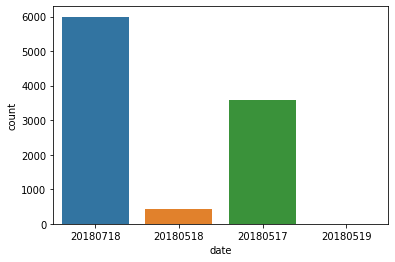

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(df['_source.last_scraped'])
plt.xlabel('date')

# Analyze All Document Distribution over Time

In [3]:
from elasticsearch.helpers import scan

res = scan(
    es,
    index=index_name,
    query={"query": { "match_all" : {}}}
)

In [4]:
data = list(res)

In [5]:
len(data)

165506

In [176]:
data[0]

{'_index': 'airbnb_history_boston',
 '_type': 'doc',
 '_id': 'gZU3P3cBYxiStLCpsEGp',
 '_score': None,
 '_source': {'id': 3781,
  'listing_url': 'https://www.airbnb.com/rooms/3781',
  'scrape_id': 20180718194756,
  'last_scraped': '20180718',
  'name': 'HARBORSIDE-Walk to subway',
  'host_id': 4804,
  'price': 125.0,
  'availability_30': 10,
  'availability_60': 25,
  'availability_90': 55,
  'availability_365': 145,
  'number_of_reviews': 14,
  'first_review': '20150710',
  'last_review': '20180702',
  'review_scores_rating': 99.0,
  'review_scores_accuracy': 10.0,
  'review_scores_cleanliness': 10.0,
  'review_scores_checkin': 10.0,
  'review_scores_communication': 10.0,
  'review_scores_location': 10.0,
  'review_scores_value': 10.0,
  'overall_rating': 5.0},
 'sort': [0]}

In [8]:

# appending rows 
docs = []
for item in data:  
    doc = {
        'id': item['_id'],
        'index': item['_index'],
        'listing_url': item['_source']['listing_url'],
        'scrape_id': item['_source']['scrape_id'],
        'last_scraped': item['_source']['last_scraped'],
        'name': item['_source']['name'],
        'host_id': item['_source']['host_id'],
        'price': item['_source']['price'],
        'availability_30': item['_source']['availability_30'],
        'availability_60': item['_source']['availability_60'],
        'availability_90': item['_source']['availability_90'],
        'availability_365': item['_source']['availability_365'],
        'first_review': item['_source']['first_review'],
        'last_review': item['_source']['last_review'],
        'review_scores_rating': item['_source']['review_scores_rating'],
        'review_scores_accuracy': item['_source']['review_scores_accuracy'],
        'review_scores_cleanliness': item['_source']['review_scores_cleanliness'],
        'review_scores_checkin': item['_source']['review_scores_checkin'],
        'review_scores_communication': item['_source']['review_scores_communication'],
        'review_scores_location': item['_source']['review_scores_location'],
        'review_scores_value': item['_source']['review_scores_value'],
        'overall_rating': item['_source']['overall_rating']
    }
    
    docs.append(doc) 

In [9]:
df = pd.DataFrame(docs)

In [11]:
import json
with open('airbnb_boston.json', 'w') as f:
    json.dump(docs, f)

In [23]:
import json
from pandas.io.json import json_normalize
import pandas as pd    

with open("search_log.json") as f:
    d = json.load(f)

df = json_normalize(d['results'])

#df2 = json_normalize(d['results'], record_path='response_body')
#df2.head(3)


df3 = json_normalize(d, record_path =['results'])
df3.head(3)


<ipython-input-23-732e4ffb55df>:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(d['results'])
<ipython-input-23-732e4ffb55df>:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df3 = json_normalize(d, record_path =['results'])


,timestamp,request_body,full_request_path,user_agent,response_body,http_method,status,path
0,2021-02-12T18:44:48Z,"{""query"":"""",""result_fields"":{""last_scraped"":{""...",/api/as/v1/engines/ml-recipes/search.json,Mozilla/5.0 (Macintosh; Intel Mac OS X 11_2_1)...,"{""meta"":{""alerts"":[],""warnings"":[],""page"":{""cu...",POST,200,None
1,2021-02-12T18:44:48Z,"{""query"":"""",""result_fields"":{""last_scraped"":{""...",/api/as/v1/engines/ml-recipes/search.json,Mozilla/5.0 (Macintosh; Intel Mac OS X 11_2_1)...,"{""meta"":{""alerts"":[],""warnings"":[],""page"":{""cu...",POST,200,None
2,2021-02-12T18:41:47Z,"{\n ""page"": {\n ""size"": 20\n }\n}",/api/as/v1/engines/ml-recipes/analytics/clicks,curl/7.64.1,"{""meta"":{""page"":{""size"":1,""current"":1}},""resul...",GET,200,None


In [24]:
!pip3 install flat-table

In [25]:
import flat_table
df = flat_table.normalize(df)

In [26]:
df

,index,timestamp,request_body,full_request_path,user_agent,response_body,http_method,status,path
0,0,2021-02-12T18:44:48Z,"{""query"":"""",""result_fields"":{""last_scraped"":{""...",/api/as/v1/engines/ml-recipes/search.json,Mozilla/5.0 (Macintosh; Intel Mac OS X 11_2_1)...,"{""meta"":{""alerts"":[],""warnings"":[],""page"":{""cu...",POST,200,None
1,1,2021-02-12T18:44:48Z,"{""query"":"""",""result_fields"":{""last_scraped"":{""...",/api/as/v1/engines/ml-recipes/search.json,Mozilla/5.0 (Macintosh; Intel Mac OS X 11_2_1)...,"{""meta"":{""alerts"":[],""warnings"":[],""page"":{""cu...",POST,200,None
2,2,2021-02-12T18:41:47Z,"{\n ""page"": {\n ""size"": 20\n }\n}",/api/as/v1/engines/ml-recipes/analytics/clicks,curl/7.64.1,"{""meta"":{""page"":{""size"":1,""current"":1}},""resul...",GET,200,None
3,3,2021-02-12T18:41:04Z,,/api/as/v1/engines/ml-recipes/analytics/clicks,curl/7.64.1,"{""meta"":{""page"":{""size"":1,""current"":1}},""resul...",GET,200,None
4,4,2021-02-12T18:40:17Z,,/api/as/v1/engines/ml-recipes/analytics/clicks,curl/7.64.1,"{""meta"":{""page"":{""size"":1,""current"":1}},""resul...",GET,200,None
5,5,2021-02-12T18:39:03Z,,/api/as/v1/engines/ml-recipes/analytics/queries,curl/7.64.1,"{""meta"":{""page"":{""size"":9,""current"":1}},""resul...",GET,200,None
6,6,2021-02-12T18:12:00Z,[filtered],/api/as/v1/engines/ml-recipes/logs/api,curl/7.64.1,[filtered],GET,200,None
7,7,2021-02-12T18:11:40Z,"{""query"":""condo"",""result_fields"":{""availabilit...",/api/as/v1/engines/ml-recipes/search.json,Mozilla/5.0 (Macintosh; Intel Mac OS X 11_2_1)...,"{""meta"":{""alerts"":[],""warnings"":[],""page"":{""cu...",POST,200,None
8,8,2021-02-12T18:11:38Z,"{""query"":""condo""}",/api/as/v1/engines/ml-recipes/query_suggestion,Mozilla/5.0 (Macintosh; Intel Mac OS X 11_2_1)...,"{""results"":{""documents"":[{""suggestion"":""condo""...",POST,200,None
9,9,2021-02-12T18:11:36Z,"{""query"":"""",""result_fields"":{""availability_365...",/api/as/v1/engines/ml-recipes/search.json,Mozilla/5.0 (Macintosh; Intel Mac OS X 11_2_1)...,"{""meta"":{""alerts"":[],""warnings"":[],""page"":{""cu...",POST,200,None


In [10]:
docs.to_json("airbnb_boston.json", orient="records", lines=True)

In [179]:
df.head()

,id,index,listing_url,scrape_id,last_scraped,name,host_id,price,availability_30,availability_60,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,overall_rating
0,gZU3P3cBYxiStLCpsEGp,airbnb_history_boston,https://www.airbnb.com/rooms/3781,20180718194756,20180718,HARBORSIDE-Walk to subway,4804,125.0,10,25,...,20150710,20180702,99,10,10,10,10,10,10,5.000000
1,gpU3P3cBYxiStLCpsEGp,airbnb_history_boston,https://www.airbnb.com/rooms/5506,20180718194756,20180718,**$99 Special ** Private! Minutes to center!,8229,145.0,3,18,...,20090321,20180705,95,10,10,10,10,9,10,4.916667
2,g5U3P3cBYxiStLCpsEGp,airbnb_history_boston,https://www.airbnb.com/rooms/6695,20180718194756,20180718,$125 Special!! Home Away! Condo,8229,169.0,2,8,...,20090806,20180601,96,10,10,10,10,9,9,4.833333
3,hJU3P3cBYxiStLCpsEGp,airbnb_history_boston,https://www.airbnb.com/rooms/6976,20180718194756,20180718,Mexican Folk Art Haven in Boston Residential Area,16701,65.0,10,24,...,20090719,20180626,98,10,9,10,10,9,10,4.833333
4,hZU3P3cBYxiStLCpsEGp,airbnb_history_boston,https://www.airbnb.com/rooms/8789,20180718194756,20180718,Curved Glass Studio/1bd facing Park,26988,99.0,7,13,...,20140812,20180624,91,9,9,10,10,10,9,4.750000


In [180]:
df.shape

(165506, 22)

In [181]:
df['last_scraped'].value_counts().sort_index(ascending=True)

20151003    2558
20160907    3585
20171006    4869
20180414     789
20180415    5602
20180517    5363
20180518     595
20180519       8
20180718    5995
20180817    6034
20180914    5955
20181011    6012
20181117    6292
20181126       2
20181213    6216
20190117    6246
20190209    6154
20190312    6220
20190415    6201
20190519    6239
20190524       1
20190614    6245
20190714    6261
20190715       2
20190819    6213
20190922    5709
20191011       1
20191018    1617
20191019    4029
20191121    5386
20191204    3504
20191205       3
20200105    3744
20200117       2
20200213    3903
20200316    3799
20200414    3845
20200512    1145
20200513    2540
20200514       3
20200610    3440
20200711    3281
20200831    1704
20200901    1635
20200906      12
20200928    2639
20200929     654
20201024    3254
Name: last_scraped, dtype: int64

In [182]:
len(df[df['last_scraped'] == '2020-09-29'])

0

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165506 entries, 0 to 165505
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           165506 non-null  object 
 1   index                        165506 non-null  object 
 2   listing_url                  165506 non-null  object 
 3   scrape_id                    165506 non-null  int64  
 4   last_scraped                 165506 non-null  object 
 5   name                         165506 non-null  object 
 6   host_id                      165506 non-null  int64  
 7   price                        165506 non-null  float64
 8   availability_30              165506 non-null  int64  
 9   availability_60              165506 non-null  int64  
 10  availability_90              165506 non-null  int64  
 11  availability_365             165506 non-null  int64  
 12  first_review                 165506 non-null  object 
 13 

In [184]:
df['crawled_date'] = df['scrape_id'].astype(str)
df['crawled_date'] = df['crawled_date'].apply(lambda x: x[:8])

In [185]:
df['crawled_date'].value_counts().sort_index(ascending=True)

20151002    2558
20160906    3585
20171005    4869
20180414    6391
20180517    5966
20180718    5995
20180817    6034
20180914    5955
20181011    6012
20181117    6294
20181213    6216
20190117    6246
20190209    6154
20190312    6220
20190415    6201
20190519    6240
20190614    6245
20190714    6263
20190819    6213
20190922    5710
20191018    5646
20191121    5386
20191204    3507
20200105    3746
20200213    3903
20200316    3799
20200414    3845
20200512    3688
20200610    3440
20200711    3293
20200831    3339
20200928    3293
20201024    3254
Name: crawled_date, dtype: int64

# Simulate Search Impressions over Time

In [186]:
# Query parameters
k = 300
location = "boston"
start_date = '2020-12-21' # default is '2020-12-21'
end_date = '2021-03-21'   # default is '2020-12-21' + 90d
index_name = "airbnb_history_" + location

In [187]:
# Ranker 1. Return top-300 documents and order by document id
res = es.search(index=index_name, body={"size": k, "query": {"match_all": {}}})
print("Got %d Hits:" % res['hits']['total']['value'])
for hit in res['hits']['hits']:
    print("%s " % hit["_score"], "%(id)s %(name)s ratings: %(overall_rating)s, price: %(price)s, availability: %(availability_30)s" % hit["_source"])

Got 10000 Hits:
1.0  3781 HARBORSIDE-Walk to subway ratings: 5.0, price: 125.0, availability: 10
1.0  5506 **$99 Special **   Private! Minutes to center! ratings: 4.916666666666667, price: 145.0, availability: 3
1.0  6695 $125 Special!! Home Away! Condo ratings: 4.833333333333333, price: 169.0, availability: 2
1.0  6976 Mexican Folk Art Haven in Boston Residential Area ratings: 4.833333333333333, price: 65.0, availability: 10
1.0  8789 Curved Glass Studio/1bd facing Park ratings: 4.75, price: 99.0, availability: 7
1.0  8792 Large 1 Bed facing State House ratings: 4.916666666666667, price: 154.0, availability: 2
1.0  8865 Walk to Medical Area - room ratings: 4.083333333333333, price: 100.0, availability: 13
1.0  9273 Stay at "HARBORVIEW" Walk to subway ratings: 4.833333333333333, price: 225.0, availability: 0
1.0  10758 Budget Single - share bath ratings: 3.5, price: 115.0, availability: 0
1.0  10807 Budget Double - share bath  ratings: 3.3333333333333335, price: 80.0, availability: 0
1

In [188]:
df = pd.json_normalize(res['hits']['hits'])


In [191]:
# Ranker 2. Return all documents and order descendingly by overall_rating, id

res = es.search(index=index_name, body={"size": k, "sort" : [{ "overall_rating" : "desc" }, "_score"], "query": {"match_all": {}}})
print("Got %d Hits:" % res['hits']['total']['value'])
for hit in res['hits']['hits']:
    print("%s " % hit["_score"], "%(id)s %(name)s ratings: %(overall_rating)s, price: %(price)s, availability: %(availability_30)s" % hit["_source"])

Got 10000 Hits:
1.0  3781 HARBORSIDE-Walk to subway ratings: 5.0, price: 125.0, availability: 10
1.0  12356 Renovated, State House View ratings: 5.0, price: 145.0, availability: 0
1.0  29765 Luxury suite, Moroccan furnishings ratings: 5.0, price: 221.0, availability: 3
1.0  39116 Private Room/Perfect Location! ratings: 5.0, price: 99.0, availability: 2
1.0  40601 Private room & bath - Jamaica Plain ratings: 5.0, price: 95.0, availability: 13
1.0  44205 Elegance at Salem Street Court ratings: 5.0, price: 184.0, availability: 1
1.0  91588 Sunny Private Bedroom. 7 minute walk to Redline T. ratings: 5.0, price: 68.0, availability: 12
1.0  160572 2 Living Rooms, Sunroom Opens to Deck Ocean View ratings: 5.0, price: 495.0, availability: 0
1.0  196806 Comfy couch, Centrally located ratings: 5.0, price: 79.0, availability: 0
1.0  197727 Wonderful  Boston neighborhood Jamaica Plain ratings: 5.0, price: 85.0, availability: 0
1.0  197972 Perfect Location--Super Studio! ratings: 5.0, price: 90.0, 

In [192]:
# Ranker 3. Return all documents with availability > 0 and order descendingly by overall_rating, id
res = es.search(index=index_name, body={
        "size": k, 
        "sort" : [
            { 
                "overall_rating" : "desc" 
            }, "_score"
        ], 
        "query": {
            "bool": {  
                "filter": [ 
                    { "range": { 
                        "availability_30": { 
                            "gt": 0 
                        }
                    }
                }
            ]}
        }
    })
print("Got %d Hits:" % res['hits']['total']['value'])
for hit in res['hits']['hits']:
    print("%s " % hit["_score"], "%(id)s %(name)s, ratings: %(overall_rating)s, price: %(price)s, availability: %(availability_30)s" % hit["_source"])

Got 10000 Hits:
0.0  3781 HARBORSIDE-Walk to subway, ratings: 5.0, price: 125.0, availability: 10
0.0  29765 Luxury suite, Moroccan furnishings, ratings: 5.0, price: 221.0, availability: 3
0.0  39116 Private Room/Perfect Location!, ratings: 5.0, price: 99.0, availability: 2
0.0  40601 Private room & bath - Jamaica Plain, ratings: 5.0, price: 95.0, availability: 13
0.0  44205 Elegance at Salem Street Court, ratings: 5.0, price: 184.0, availability: 1
0.0  91588 Sunny Private Bedroom. 7 minute walk to Redline T., ratings: 5.0, price: 68.0, availability: 12
0.0  197972 Perfect Location--Super Studio!, ratings: 5.0, price: 90.0, availability: 4
0.0  210097 Treetop Haven in the City, ratings: 5.0, price: 100.0, availability: 2
0.0  395975 Steps to Beach, Bars and Downtown!, ratings: 5.0, price: 88.0, availability: 30
0.0  475988 Great 1 bedroom apartment near parks and T in JP!, ratings: 5.0, price: 79.0, availability: 1
0.0  568234 City's Hippest Location/Two Bedrooms/Parking, ratings: 5.0